In [20]:
#!pip install calmap

You should consider upgrading via the 'C:\Users\gonca\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, RidgeCV, LogisticRegression, LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
import calmap
import warnings
warnings.filterwarnings('ignore')

### Functions

In [4]:
def find_missing(df):
    missing_col = df.columns[df.isna().sum()>0]
    col_missing_val = df[missing_col].isna().sum().sort_values(ascending=False)
    per_missing_val = (df[missing_col].isna().sum()/df.shape[0]*100).sort_values(ascending=False)
    missing_df = pd.DataFrame(col_missing_val,columns=['missing_number'])
    missing_df['missing_percentage']=per_missing_val
    print('Number of columns with missing data:',missing_df.shape[0])
    return missing_df

## Load and first analysis of the dataset

In [159]:
#loading the Bookings dataset
data = pd.read_csv(r'C:\Users\gonca\Documents\BC2_Predict_Cancellations\data\H2.csv') 
data.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [161]:
#Country shouldn't be used for analysis as its quality is dependent on chek-in
data = data.drop(['Country'], axis=1)

In [162]:
# Cheecking for duplicates
data.duplicated().sum()


27294

The dataset that we are using had already some pre-procecing with some imputations, so after analysing the data we conclude that the duplicated values are coicidences and not real duplicated enteries 

In [163]:
find_missing(data)

Number of columns with missing data: 1


,missing_number,missing_percentage
Children,4,0.005042


We

In [164]:

data.fillna(0, inplace =True)

In [165]:
find_missing(data)

Number of columns with missing data: 0


,missing_number,missing_percentage


In [20]:
Cancelations = data['IsCanceled'].tolist()
print(Cancelations.count(1), 'canceled')
print(Cancelations.count(0), 'not canceled')

33102 canceled
46228 not canceled


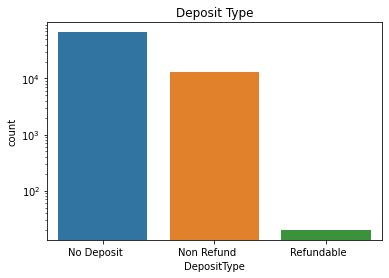

In [22]:
sns.countplot('DepositType', data=data)
plt.title('Deposit Type')
plt.yscale("log")

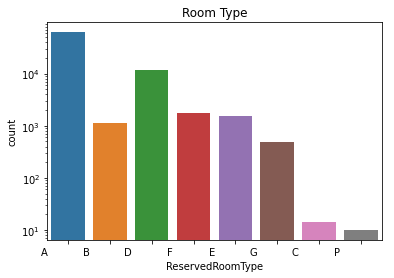

In [23]:
sns.countplot('ReservedRoomType', data=data)
plt.title('Room Type')
plt.yscale("log")

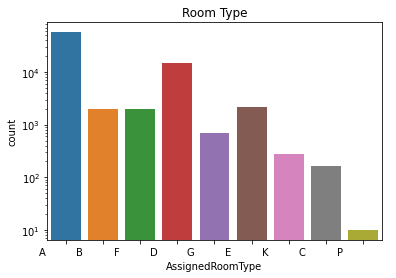

In [24]:
sns.countplot('AssignedRoomType', data=data)
plt.title('Room Type')
plt.yscale("log")

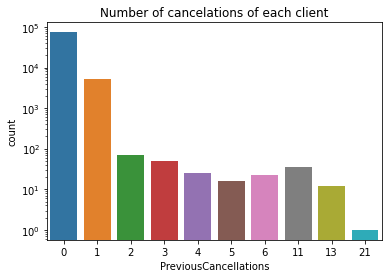

In [25]:
sns.countplot('PreviousCancellations', data=data)
plt.title('Number of cancelations of each client')
plt.yscale("log")

### Feature Engeneering

In [166]:
data['changeroomtype'] = data['AssignedRoomType'] != data['ReservedRoomType']

In [167]:
data[data['changeroomtype'] == True]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,changeroomtype
134,1,0,2015,July,29,15,0,1,2,0.0,...,NULL,NULL,0,Transient,0.00,0,0,Canceled,2015-07-15,True
139,0,0,2015,July,29,15,2,5,2,0.0,...,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-22,True
237,0,20,2015,July,30,22,0,2,2,0.0,...,1,NULL,0,Transient-Party,62.00,0,0,Check-Out,2015-07-24,True
250,0,20,2015,July,30,22,0,2,2,0.0,...,1,NULL,0,Transient-Party,62.00,0,0,Check-Out,2015-07-24,True
253,0,20,2015,July,30,22,0,2,2,0.0,...,1,NULL,0,Transient-Party,62.00,0,0,Check-Out,2015-07-24,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79213,0,213,2017,August,35,28,1,3,1,0.0,...,19,NULL,0,Transient-Party,104.00,0,0,Check-Out,2017-09-01,True
79214,0,213,2017,August,35,28,1,3,1,0.0,...,19,NULL,0,Transient-Party,104.00,0,0,Check-Out,2017-09-01,True
79229,0,25,2017,August,35,30,0,3,3,0.0,...,9,NULL,0,Transient,236.33,0,3,Check-Out,2017-09-02,True
79237,0,332,2017,August,35,31,0,2,2,0.0,...,9,NULL,0,Transient,170.80,0,2,Check-Out,2017-09-02,True


In [168]:
data.corr().abs()['IsCanceled'].sort_values(ascending=False).head(30)

IsCanceled                     1.000000
LeadTime                       0.309242
TotalOfSpecialRequests         0.293889
changeroomtype                 0.229972
PreviousCancellations          0.166643
BookingChanges                 0.149500
RequiredCarParkingSpaces       0.133096
IsRepeatedGuest                0.065840
DaysInWaitingList              0.060965
PreviousBookingsNotCanceled    0.053134
Adults                         0.053054
StaysInWeekNights              0.048704
Babies                         0.030186
Children                       0.027089
ADR                            0.011965
StaysInWeekendNights           0.007343
ArrivalDateDayOfMonth          0.004331
ArrivalDateYear                0.003004
ArrivalDateWeekNumber          0.001580
Name: IsCanceled, dtype: float64

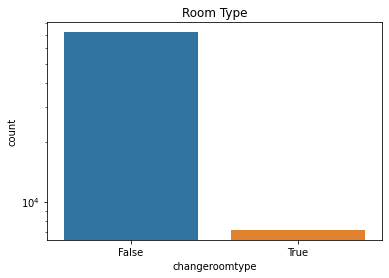

In [169]:
sns.countplot('changeroomtype', data=data)
plt.title('Room Type')
plt.yscale("log")

Create a variable with the arrival date

In [170]:
data['ArrivalDate'] = data['ArrivalDateDayOfMonth'].astype(str)+'/'+data['ArrivalDateMonth']+'/'+data['ArrivalDateYear'].astype(str)

In [171]:
data['ArrivalDate'] = pd.to_datetime(data['ArrivalDate'])

In [172]:
data['ArrivalDate']

0       2015-07-01
1       2015-07-01
2       2015-07-01
3       2015-07-01
4       2015-07-02
           ...    
79325   2017-08-30
79326   2017-08-31
79327   2017-08-31
79328   2017-08-31
79329   2017-08-29
Name: ArrivalDate, Length: 79330, dtype: datetime64[ns]

In [173]:
events = data[['ArrivalDate']]
events['foo'] = events.apply(lambda _: '1', axis=1)
events

,ArrivalDate,foo
0,2015-07-01,1
1,2015-07-01,1
2,2015-07-01,1
3,2015-07-01,1
4,2015-07-02,1
...,...,...
79325,2017-08-30,1
79326,2017-08-31,1
79327,2017-08-31,1
79328,2017-08-31,1


In [174]:
a = events.groupby(['ArrivalDate']).count()
a

,foo
ArrivalDate,
2015-07-01,79
2015-07-02,49
2015-07-03,16
2015-07-04,38
2015-07-05,8
...,...
2017-08-27,107
2017-08-28,133
2017-08-29,90


### Split the metric variables from the non metric one

In [175]:
# Splitting feature into metric and non metric
non_metric_features = ['ArrivalDate','IsCanceled','ArrivalDateYear','ArrivalDateMonth','ArrivalDateWeekNumber','ArrivalDateDayOfMonth','Meal','MarketSegment','DistributionChannel','IsRepeatedGuest','ReservedRoomType','AssignedRoomType','changeroomtype','DepositType','Company','Agent','CustomerType ','RequiredCarParkingSpaces','ArrivalDate','ReservationStatus','ReservationStatusDate']
metric_features = ['LeadTime','StaysInWeekendNights','StaysInWeekNights','Adults','Children','Babies','PreviousCancellations','PreviousBookingsNotCanceled','BookingChanges','DaysInWaitingList','ADR','TotalOfSpecialRequests']
# Checking that no variable is left behind (Só dá true depois de correr a feature Engeneering)
len(metric_features) + len(non_metric_features) == len(data.columns)

False

In [176]:
data[metric_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LeadTime                     79330 non-null  int64  
 1   StaysInWeekendNights         79330 non-null  int64  
 2   StaysInWeekNights            79330 non-null  int64  
 3   Adults                       79330 non-null  int64  
 4   Children                     79330 non-null  float64
 5   Babies                       79330 non-null  int64  
 6   PreviousCancellations        79330 non-null  int64  
 7   PreviousBookingsNotCanceled  79330 non-null  int64  
 8   BookingChanges               79330 non-null  int64  
 9   DaysInWaitingList            79330 non-null  int64  
 10  ADR                          79330 non-null  float64
 11  TotalOfSpecialRequests       79330 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 7.3 MB


## One Hot Enconding 

In [177]:
data_ohc = data.copy()

In [178]:
##Non metric features excluding the target variable, the variable created with the date of the reservation completed, the ArrivalDateDayOfMonth, the ArrivalDate and the ReservationStatusDate
non_metric_features = ['ArrivalDateYear','ArrivalDateMonth','ArrivalDateWeekNumber','Meal','MarketSegment','DistributionChannel','IsRepeatedGuest','ReservedRoomType','AssignedRoomType','changeroomtype','DepositType','Company','Agent','CustomerType','RequiredCarParkingSpaces','ReservationStatus']

In [179]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(data_ohc[non_metric_features])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=data_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df.head(3)

,x0_2016,x0_2017,x1_August,x1_December,x1_February,x1_January,x1_July,x1_June,x1_March,x1_May,...,x12_ 509,x12_ NULL,x13_Group,x13_Transient,x13_Transient-Party,x14_1,x14_2,x14_3,x15_Check-Out,x15_No-Show
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
# Reassigning data to contain ohc variables
data_ohc = pd.concat([data_ohc.drop(columns=non_metric_features), ohc_df], axis=1)
data_ohc.head(3)

,IsCanceled,LeadTime,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,...,x12_ 509,x12_ NULL,x13_Group,x13_Transient,x13_Transient-Party,x14_1,x14_2,x14_3,x15_Check-Out,x15_No-Show
0,0,6,1,0,2,1,0.0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,88,1,0,4,2,0.0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,65,1,0,4,1,0.0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


##  2. Feature Selection
In feature selection several different models contribute with different perspectives, this said, our methodology regarding feature selection was to create an artificial collaboration to get the best from each method. 

5 different methods were used, namely correlation with our target variable, rfe, lasso CV, Ridge Regression, and a Decision Tree feature selection for both gini and entropy criterions. We used the best 30 features for all methods, except for the Ridge regression in which we used only the ones that were different than 0. Then counted the times a feature appeared for each method and we applied a threshold. This threshold allowed us to have a good feature selection and to easily manipulate the amount of features we had in our model by just lowering the threshold from minimum 2 methods or to minimum 3 methods required to appear in the final variables for the classification solution.  
- Using Correlation w/ Income
- Using rfe
- Using LassoCV
- Using Ridge CV
- Using DecisionTreeClassifier

In [207]:
# Splitting feature names into groups
i_non_metric_features = data_ohc.select_dtypes(include=['object','datetime64[ns]']).columns
i_metric_features = data_ohc.select_dtypes(exclude=['object','datetime64[ns]']).columns

In [208]:
i_metric_features

Index(['IsCanceled', 'LeadTime', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'PreviousCancellations', 'PreviousBookingsNotCanceled',
       ...
       'x12_        509', 'x12_       NULL', 'x13_Group', 'x13_Transient',
       'x13_Transient-Party', 'x14_1', 'x14_2', 'x14_3', 'x15_Check-Out',
       'x15_No-Show'],
      dtype='object', length=550)

In [210]:
data_ohc[metric_features].dtypes.value_counts()

int64      10
float64     2
dtype: int64

In [211]:
data = data_ohc[i_metric_features].copy().drop(['IsCanceled'], axis=1)
target = data_ohc['IsCanceled']

In [212]:
top30 = list()

##### Using Correlation w/ IsCanceled

In [138]:
data_ohc.corr().abs()['IsCanceled'].sort_values(ascending=False).head(30)

IsCanceled                1.000000
x15_Check-Out             1.000000
x10_Non Refund            0.518325
LeadTime                  0.309242
TotalOfSpecialRequests    0.293889
x4_Groups                 0.254432
x9_True                   0.229972
x5_TA/TO                  0.172369
PreviousCancellations     0.166643
BookingChanges            0.149500
x13_Transient-Party       0.146155
x5_Direct                 0.146034
x4_Direct                 0.142699
x13_Transient             0.136191
x14_1                     0.133304
x8_D                      0.129250
x15_No-Show               0.127725
x12_          7           0.124162
x12_         14           0.105910
x12_         28           0.104326
x11_       NULL           0.091696
x4_Online TA              0.085782
x4_Corporate              0.081256
x12_         19           0.075057
x11_         40           0.073516
x12_         29           0.072338
x12_       NULL           0.066064
x12_        236           0.066044
x6_1                

In [215]:
top30.append(data_ohc.corr().abs()['IsCanceled'].sort_values(ascending=False).head(30))

##### Using rfe

In [213]:
modelLR = LinearRegression()
rfe = RFE(estimator = modelLR, n_features_to_select = 30)
c = rfe.fit_transform(X = data, y = target)
modelLR.fit(X = data, y = target)
selected_features = pd.Series(rfe.support_, index = data.columns)
selected_features[selected_features.values==True]

x0_2017                True
x4_Undefined           True
x7_P                   True
x8_P                   True
x11_         11        True
x11_         35        True
x11_         49        True
x11_        115        True
x11_        135        True
x11_        229        True
x11_        230        True
x11_        253        True
x11_        259        True
x11_        264        True
x11_        277        True
x11_        360        True
x11_        366        True
x11_        466        True
x11_        489        True
x11_        494        True
x12_         33        True
x12_         57        True
x12_         73        True
x12_        106        True
x12_        107        True
x12_        242        True
x12_        355        True
x12_        476        True
x14_3                  True
x15_Check-Out          True
dtype: bool

In [214]:
top30.append(selected_features[selected_features.values==True].index)

##### Using Lasso Regression

In [216]:
reg = LassoCV()
reg.fit(X = data,y = target)


LassoCV()

In [217]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(data,target))

coef = pd.Series(reg.coef_, index = data.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 0.016918
Best score using built-in LassoCV: 0.994657
Lasso picked 3 variables and eliminated the other 546 variables


In [218]:
top30.append(coef[coef.values!=0].index)

##### Using Ridge Regression

In [219]:
ridge = RidgeCV()
ridge.fit(X = data, y = target)
print('The alpha atribute using RidgeCV: %f' %ridge.alpha_)
print('The score using RidgeCV: %f' %ridge.score(data,target))
coef_ridge = pd.Series(ridge.coef_, index = data.columns)
coef_ridge.sort_values(ascending=False).head(30)

The alpha atribute using RidgeCV: 0.100000
The score using RidgeCV: 1.000000


x11_        321        0.000011
x1_December            0.000010
x1_November            0.000009
x11_        452        0.000008
x11_        277        0.000008
x1_October             0.000008
x12_        270        0.000008
x11_        466        0.000008
x11_        428        0.000007
x1_September           0.000007
x15_No-Show            0.000007
x11_        253        0.000006
x5_Undefined           0.000006
x11_        316        0.000006
x12_        403        0.000006
x12_        276        0.000006
x11_        350        0.000006
x3_FB                  0.000006
x1_August              0.000005
x12_        341        0.000005
x12_        107        0.000005
x4_Undefined           0.000005
x4_Groups              0.000005
x4_Offline TA/TO       0.000005
x11_         85        0.000005
x11_        288        0.000004
x10_Non Refund         0.000004
x12_        355        0.000004
x12_         57        0.000004
x4_Online TA           0.000004
dtype: float64

In [220]:
top30.append(coef_ridge.sort_values(ascending=False).head(30).index)

##### Using DecisionTreeClassifier

In [221]:
gini_importance = DecisionTreeClassifier().fit(data, target).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(data, target).feature_importances_

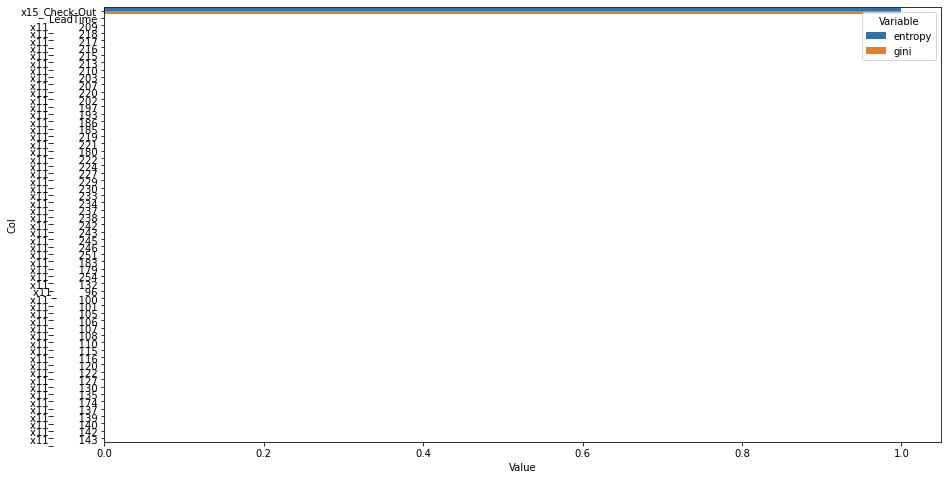

In [222]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = data.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy.head(60))

In [223]:
top30.append(tidy.sort_values(['Value'], ascending = False).head(60)['Col'].drop_duplicates().values)

In [224]:
onlyDT = tidy.sort_values(['Value'], ascending = False).head(60)['Col'].values.tolist()

In [225]:
onlyDT

['x15_Check-Out',
 'x15_Check-Out',
 'x11_        207',
 'PreviousBookingsNotCanceled',
 'x0_2017',
 'x0_2016',
 'TotalOfSpecialRequests',
 'ADR',
 'DaysInWaitingList',
 'BookingChanges',
 'PreviousCancellations',
 'x11_         84',
 'Babies',
 'Children',
 'Adults',
 'StaysInWeekNights',
 'StaysInWeekendNights',
 'x1_December',
 'x1_August',
 'x1_February',
 'x2_8',
 'x1_January',
 'x1_July',
 'x1_June',
 'x1_March',
 'x1_May',
 'x1_November',
 'x1_October',
 'x1_September',
 'x2_2',
 'x2_3',
 'x2_4',
 'x2_5',
 'x2_6',
 'x2_7',
 'x2_9',
 'x2_10',
 'x2_11',
 'x2_26',
 'x2_25',
 'x2_24',
 'x2_23',
 'x2_22',
 'x2_21',
 'x2_20',
 'x2_18',
 'x11_         81',
 'x2_17',
 'x2_16',
 'x2_15',
 'x2_14',
 'x2_13',
 'x2_12',
 'x2_27',
 'x2_42',
 'x2_28',
 'x2_29',
 'x2_30',
 'x2_31',
 'x2_32']

##### Final Variables
As the different methods gave different results we will use the fields that appear in more than 1 method



In [226]:
series30 = pd.Series(top30) 
series30 = series30.explode().value_counts()
onlyDT = tidy.sort_values(['Value'], ascending = False).head(60)['Col'].values.tolist()
DT15 = tidy.sort_values(['Value'], ascending = False).head(30)['Col'].values.tolist()
final_var1 = series30[series30.values>1].index
final_var2 = series30[series30.values>2].index
final_var3 = series30[series30.values>3].index

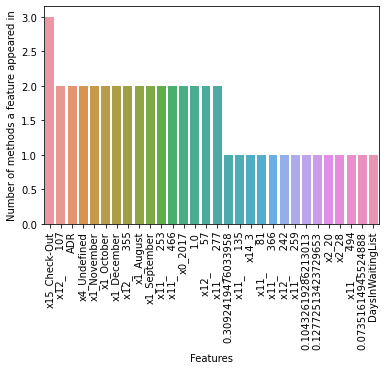

In [228]:
sns.barplot(x='index',y=0,data=series30.reset_index().head(30))
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of methods a feature appeared in')
plt.xlabel('Features')
plt.show()

The previous graph illustrates the way our method works. If we were to set threshold in 3 we would get all the values above 3, i.e. x0_Wife, x2_Married, x6_professor, x5_Self-Employed (Company), x6_Management.